# GPU Compute Cost

This notebook was used to deterimine what type of GPU system to use for training and testing some deep learning models I'm working on. The costs are accurate as of 20171101. Here are my notes from Googleing:


* AWS (dollars per hour)
    * P2 - Tesla K80
        * XL - 0.9
        * 8XL - 7.2
        * 16XL - 14.4
    * P3 - Tesla V100
        * 2XL - 3.06
        * 8XL - 12.24
        * 16XL - 24.48
* GCP (dollars per hour) - these are just for GPU. I've added in comparable CPU compute costs in the code below.
    * Tesla P100
        * 1 gpu - 2.30
        * 2 gpu - 4.60
        * 4 gpu - 9.2
    * Tesla K80
        * 1 - .7
        * 2 - 1.4
        * 4 - 2.8
        * 8 - 5.6
* NVIDIA DGX
    * Station
        * 4x Tesla V100s
        * Max Power req - 1500W
        * 69k dollars + support plan (15k dollars per year estimated from google search)
    * DGX-1
        * 8x Tesla v100s
        * Max power req - 3200W
        * 150k dollars + support plan (30k dollars per year estimated from google search)
* Home built GPU workstation
    * Deeplearning 11
        * 16,500 bucks
        * 10x NVIDIA GTX 1080Ti
        * Average Power req - 3000W
        * “We are spending around 1k bucks per month on power”
        * GTX 1080Ti compute capability 6.1, P100 = 6.0 ??? wow
        * Comparable to p2.16xlarge

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
hours = 25000

p2_xl = np.zeros(hours)
p2_8xl = np.zeros(hours)
p2_16xl = np.zeros(hours)

p3_2xl = np.zeros(hours)
p3_8xl = np.zeros(hours)
p3_16xl = np.zeros(hours)

gcp_p100_1 = np.zeros(hours)
gcp_p100_2 = np.zeros(hours)
gcp_p100_4 = np.zeros(hours)

gcp_k80_1 = np.zeros(hours)
gcp_k80_2 = np.zeros(hours)
gcp_k80_4 = np.zeros(hours)
gcp_k80_8 = np.zeros(hours)

for i in range(hours):
    p2_xl[i] = i * .9
    p2_8xl[i] = i * 7.2
    p2_16xl[i] = i * 14.4

    p3_2xl[i] = i * 3.06
    p3_8xl[i] = i * 12.24
    p3_16xl[i] = i * 24.48

    gcp_p100_1[i] = i * (2.3 + .2368)
    gcp_p100_2[i] = i * (4.6 + .4736)
    gcp_p100_4[i] = i * (9.2 + 3.7888)

    gcp_k80_1[i] = i * (.7 + .2368)
    gcp_k80_2[i] = i * (1.4 + .9472)
    gcp_k80_4[i] = i * (2.8 + 1.8944)
    gcp_k80_8[i] = i * ( 5.6 + 3.7888)

Power price found on [Austin Energy](http://austinenergy.com/wps/portal/ae/residential/rates/residential-electric-rates-and-line-items/!ut/p/a1/jZCxTsMwEEC_pUNGx66j0sAWDAqhLZlIgxdk0mtiybEj-0okvp5ULIBa6G0nvac7PSppTaVV77pVqJ1V5rjLq1fGU_4gGC_yJU9Zlovb1aJ6ms_XbAJevgPlfXnHiqqssnIlWC6SC_0zk7H__McLDnC_EZuWykFhR7TdO1p7CHoHFrUyBAw06HVDvEIIRNkdMdoC0Qh9OPqZfUvSyfewBw8-PvgpTIc4hJuIRWwcx7h1rjUQN66P2CmlcwFp_ZOkWyr_-p4ni9_AibxfwPl-Q_9cf6xhm-J1obPZ7BPxDgh_/dl5/d5/L2dBISEvZ0FBIS9nQSEh/)'s website. I used the highest tier of residential pricing (about 11 cents per kWh).

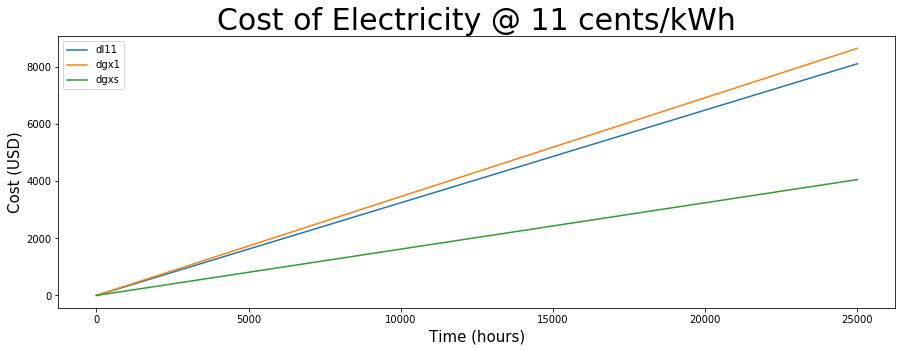

In [3]:
dl11_kw = 3
dgx1_kw = 3.2
dgxs_kw = 1.5

atx_pwr_price = .10814

dl11_pwr_cost = np.zeros(hours)
dgx1_pwr_cost = np.zeros(hours)
dgxs_pwr_cost = np.zeros(hours)

for i in range(hours):
    dl11_pwr_cost[i] = dl11_kw * i * atx_pwr_price
    dgx1_pwr_cost[i] = dgx1_kw * i * atx_pwr_price
    dgxs_pwr_cost[i] = dgxs_kw * i * atx_pwr_price
    
plt.figure(figsize=(15,5))
    
plt.plot(dl11_pwr_cost, label='dl11')
plt.plot(dgx1_pwr_cost, label='dgx1')
plt.plot(dgxs_pwr_cost, label='dgxs')

plt.title('Cost of Electricity @ 11 cents/kWh', fontsize=30)
plt.xlabel('Time (hours)', fontsize=15)
plt.ylabel('Cost (USD)', fontsize=15)
plt.legend()
plt.show()

In [4]:
dgx_station = np.zeros(hours)
dgx_1 = np.zeros(hours)
dgx_1_maint = 30000
dgx_station_maint = 15000

for i in range(hours):
    dgx_station[i] = 69000 - 15000*2 + dgx_station_maint + dgxs_pwr_cost[i]
    dgx_1[i] = 150000 - 30000*2 + dgx_1_maint + dgx1_pwr_cost[i]
    
    if (i % 8760) == 0:
        dgx_1_maint += 30000
        dgx_station_maint += 15000
        
dl11 = np.zeros(hours)

for i in range(hours):
    dl11[i] = 16500 + dl11_pwr_cost[i]

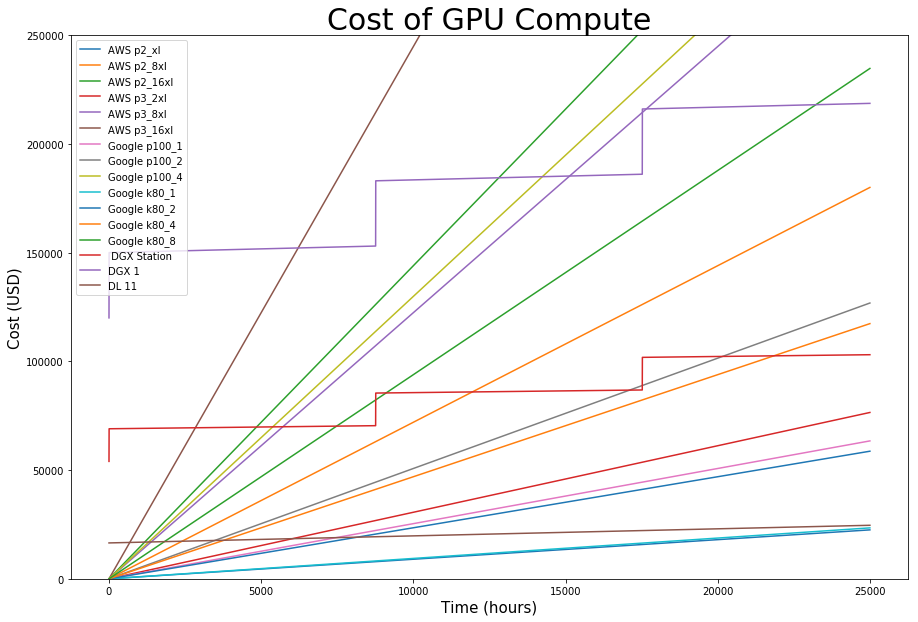

In [5]:
plt.figure(figsize=(15,10))

plt.plot(p2_xl, label='AWS p2_xl')
plt.plot(p2_8xl, label='AWS p2_8xl')
plt.plot(p2_16xl, label='AWS p2_16xl')
plt.plot(p3_2xl, label='AWS p3_2xl')
plt.plot(p3_8xl, label='AWS p3_8xl')
plt.plot(p3_16xl, label='AWS p3_16xl')
plt.plot(gcp_p100_1, label='Google p100_1')
plt.plot(gcp_p100_2, label='Google p100_2')
plt.plot(gcp_p100_4, label='Google p100_4')
plt.plot(gcp_k80_1, label='Google k80_1')
plt.plot(gcp_k80_2, label='Google k80_2')
plt.plot(gcp_k80_4, label='Google k80_4')
plt.plot(gcp_k80_8, label='Google k80_8')

plt.plot(dgx_station, label=' DGX Station')
plt.plot(dgx_1, label='DGX 1')

plt.plot(dl11, label='DL 11')

plt.ylim([0,250000])

plt.title('Cost of GPU Compute', fontsize=30)
plt.xlabel('Time (hours)', fontsize=15)
plt.ylabel('Cost (USD)', fontsize=15)
plt.legend()
plt.show()

#plt.savefig('GPU_compute_cost.png', dpi=300)

## Condsidering Compute Capacity

These devices are advertised at various compute speeds, I'm using the highest advertised speed on NVIDIAs spec sheets here. This is a skewed quantitative measure of compute capacity, but it does give me a qualitative baseline for comparison. The following speeds are listed in Tflops:

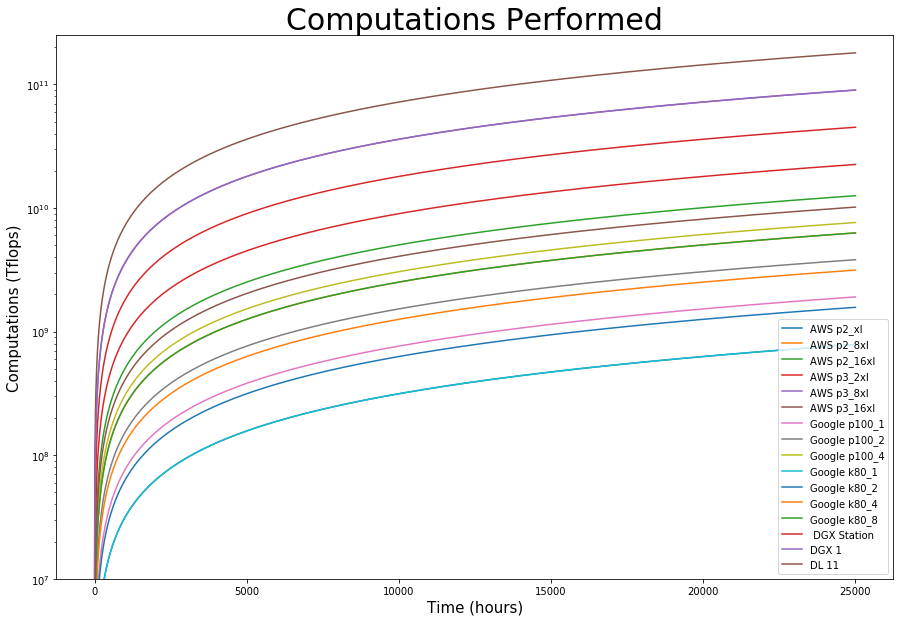

In [6]:
v100 = 125
p100 = 21.2
k80 = 8.73
ti1080 = 11.3

p2_xl_cc = np.zeros(hours)
p2_8xl_cc = np.zeros(hours)
p2_16xl_cc = np.zeros(hours)
p3_2xl_cc = np.zeros(hours)
p3_8xl_cc = np.zeros(hours)
p3_16xl_cc = np.zeros(hours)
gcp_p100_1_cc = np.zeros(hours)
gcp_p100_2_cc = np.zeros(hours)
gcp_p100_4_cc = np.zeros(hours)
gcp_k80_1_cc = np.zeros(hours)
gcp_k80_2_cc = np.zeros(hours)
gcp_k80_4_cc = np.zeros(hours)
gcp_k80_8_cc = np.zeros(hours)
dgx_station_cc = np.zeros(hours)
dgx_1_cc = np.zeros(hours)
dl11_cc = np.zeros(hours)

for i in range(hours):
    p2_xl_cc[i] = 1 * k80 * 3600 * i
    p2_8xl_cc[i] = 8 * k80 * 3600 * i
    p2_16xl_cc[i] = 16 * k80 * 3600 * i

    p3_2xl_cc[i] = 2 * v100 * 3600 * i
    p3_8xl_cc[i] = 8 * v100 * 3600 * i
    p3_16xl_cc[i] = 16 * v100 * 3600 * i

    gcp_p100_1_cc[i] = 1 * p100 * 3600 * i
    gcp_p100_2_cc[i] = 2 * p100 * 3600 * i
    gcp_p100_4_cc[i] = 4 * p100 * 3600 * i

    gcp_k80_1_cc[i] = 1 * k80 * 3600 * i
    gcp_k80_2_cc[i] = 2 * k80 * 3600 * i
    gcp_k80_4_cc[i] = 4 * k80 * 3600 * i
    gcp_k80_8_cc[i] = 8 * k80 * 3600 * i
    
    dgx_station_cc[i] = 4 * v100 * 3600 * i
    dgx_1_cc[i] = 8 * v100 * 3600 * i
    
    dl11_cc[i] = 10 * ti1080 * 3600 * i
    
plt.figure(figsize=(15,10))

plt.semilogy(p2_xl_cc, label='AWS p2_xl')
plt.semilogy(p2_8xl_cc, label='AWS p2_8xl')
plt.semilogy(p2_16xl_cc, label='AWS p2_16xl')
plt.semilogy(p3_2xl_cc, label='AWS p3_2xl')
plt.semilogy(p3_8xl_cc, label='AWS p3_8xl')
plt.semilogy(p3_16xl_cc, label='AWS p3_16xl')
plt.semilogy(gcp_p100_1_cc, label='Google p100_1')
plt.semilogy(gcp_p100_2_cc, label='Google p100_2')
plt.semilogy(gcp_p100_4_cc, label='Google p100_4')
plt.semilogy(gcp_k80_1_cc, label='Google k80_1')
plt.semilogy(gcp_k80_2_cc, label='Google k80_2')
plt.semilogy(gcp_k80_4_cc, label='Google k80_4')
plt.semilogy(gcp_k80_8_cc, label='Google k80_8')

plt.semilogy(dgx_station_cc, label=' DGX Station')
plt.semilogy(dgx_1_cc, label='DGX 1')

plt.semilogy(dl11_cc, label='DL 11')

plt.ylim([10000000,250000000000])

plt.title('Computations Performed', fontsize=30)
plt.xlabel('Time (hours)', fontsize=15)
plt.ylabel('Computations (Tflops)', fontsize=15)
plt.legend()
plt.show()

#plt.savefig('GPU_computations_performed.png', dpi=300)

Now I'll plot some qualitative measure of benefit measured as Tflops/$:

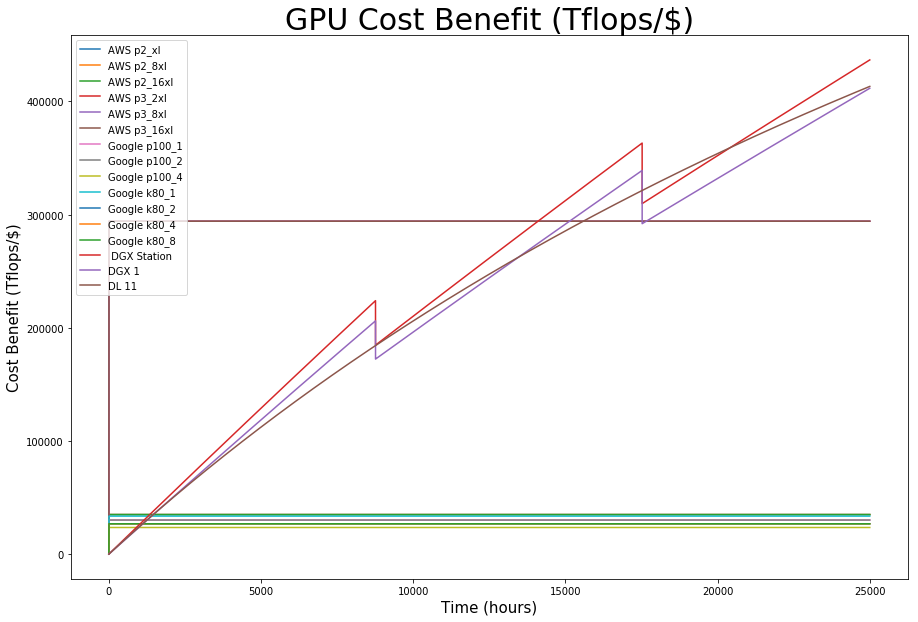

In [7]:
p2_xl_ben = np.zeros(hours)
p2_8xl_ben = np.zeros(hours)
p2_16xl_ben = np.zeros(hours)
p3_2xl_ben = np.zeros(hours)
p3_8xl_ben = np.zeros(hours)
p3_16xl_ben = np.zeros(hours)
gcp_p100_1_ben = np.zeros(hours)
gcp_p100_2_ben = np.zeros(hours)
gcp_p100_4_ben = np.zeros(hours)
gcp_k80_1_ben = np.zeros(hours)
gcp_k80_2_ben = np.zeros(hours)
gcp_k80_4_ben = np.zeros(hours)
gcp_k80_8_ben = np.zeros(hours)
dgx_station_ben = np.zeros(hours)
dgx_1_ben = np.zeros(hours)
dl11_ben = np.zeros(hours)

# prewhiten
p2_xl += 0.0001
p2_8xl += 0.0001
p2_16xl += 0.0001
p3_2xl += 0.0001
p3_8xl += 0.0001
p3_16xl += 0.0001
gcp_p100_1 += 0.0001
gcp_p100_2 += 0.0001
gcp_p100_4 += 0.0001
gcp_k80_1 += 0.0001
gcp_k80_2 += 0.0001
gcp_k80_4 += 0.0001
gcp_k80_8 += 0.0001
dgx_station += 0.0001
dgx_1 += 0.0001
dl11 += 0.0001

p2_xl_ben = p2_xl_cc / p2_xl
p2_8xl_ben = p2_8xl_cc / p2_8xl
p2_16xl_ben = p2_16xl_cc / p2_16xl
p3_2xl_ben = p3_2xl_cc / p3_2xl
p3_8xl_ben = p3_8xl_cc / p3_8xl
p3_16xl_ben = p3_16xl_cc / p3_16xl
gcp_p100_1_ben = gcp_p100_1_cc / gcp_p100_1
gcp_p100_2_ben = gcp_p100_2_cc / gcp_p100_2
gcp_p100_4_ben = gcp_p100_4_cc / gcp_p100_4
gcp_k80_1_ben =  gcp_k80_1_cc / gcp_k80_1
gcp_k80_2_ben = gcp_k80_2_cc / gcp_k80_2
gcp_k80_4_ben = gcp_k80_4_cc / gcp_k80_4
gcp_k80_8_ben = gcp_k80_8_cc / gcp_k80_8 
dgx_station_ben = dgx_station_cc / dgx_station
dgx_1_ben = dgx_1_cc / dgx_1  
dl11_ben = dl11_cc / dl11 

plt.figure(figsize=(15,10))

plt.plot(p2_xl_ben, label='AWS p2_xl')
plt.plot(p2_8xl_ben, label='AWS p2_8xl')
plt.plot(p2_16xl_ben, label='AWS p2_16xl')
plt.plot(p3_2xl_ben, label='AWS p3_2xl')
plt.plot(p3_8xl_ben, label='AWS p3_8xl')
plt.plot(p3_16xl_ben, label='AWS p3_16xl')
plt.plot(gcp_p100_1_ben, label='Google p100_1')
plt.plot(gcp_p100_2_ben, label='Google p100_2')
plt.plot(gcp_p100_4_ben, label='Google p100_4')
plt.plot(gcp_k80_1_ben, label='Google k80_1')
plt.plot(gcp_k80_2_ben, label='Google k80_2')
plt.plot(gcp_k80_4_ben, label='Google k80_4')
plt.plot(gcp_k80_8_ben, label='Google k80_8')
plt.plot(dgx_station_ben, label=' DGX Station')
plt.plot(dgx_1_ben, label='DGX 1')
plt.plot(dl11_ben, label='DL 11')

#plt.ylim([10000000,250000000000])

plt.title('GPU Cost Benefit (Tflops/$)', fontsize=30)
plt.xlabel('Time (hours)', fontsize=15)
plt.ylabel('Cost Benefit (Tflops/$)', fontsize=15)
plt.legend()
plt.show()

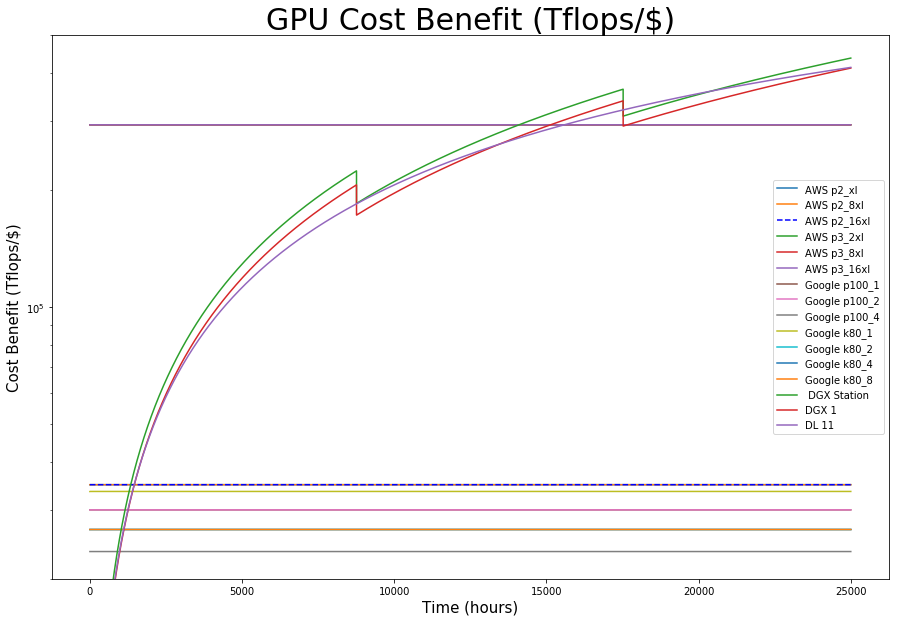

In [10]:
p2_xl_ben = np.zeros(hours)
p2_8xl_ben = np.zeros(hours)
p2_16xl_ben = np.zeros(hours)
p3_2xl_ben = np.zeros(hours)
p3_8xl_ben = np.zeros(hours)
p3_16xl_ben = np.zeros(hours)
gcp_p100_1_ben = np.zeros(hours)
gcp_p100_2_ben = np.zeros(hours)
gcp_p100_4_ben = np.zeros(hours)
gcp_k80_1_ben = np.zeros(hours)
gcp_k80_2_ben = np.zeros(hours)
gcp_k80_4_ben = np.zeros(hours)
gcp_k80_8_ben = np.zeros(hours)
dgx_station_ben = np.zeros(hours)
dgx_1_ben = np.zeros(hours)
dl11_ben = np.zeros(hours)

# prewhiten
p2_xl += 0.0001
p2_8xl += 0.0001
p2_16xl += 0.0001
p3_2xl += 0.0001
p3_8xl += 0.0001
p3_16xl += 0.0001
gcp_p100_1 += 0.0001
gcp_p100_2 += 0.0001
gcp_p100_4 += 0.0001
gcp_k80_1 += 0.0001
gcp_k80_2 += 0.0001
gcp_k80_4 += 0.0001
gcp_k80_8 += 0.0001
dgx_station += 0.0001
dgx_1 += 0.0001
dl11 += 0.0001

p2_xl_ben = p2_xl_cc / p2_xl
p2_8xl_ben = p2_8xl_cc / p2_8xl
p2_16xl_ben = p2_16xl_cc / p2_16xl
p3_2xl_ben = p3_2xl_cc / p3_2xl
p3_8xl_ben = p3_8xl_cc / p3_8xl
p3_16xl_ben = p3_16xl_cc / p3_16xl
gcp_p100_1_ben = gcp_p100_1_cc / gcp_p100_1
gcp_p100_2_ben = gcp_p100_2_cc / gcp_p100_2
gcp_p100_4_ben = gcp_p100_4_cc / gcp_p100_4
gcp_k80_1_ben =  gcp_k80_1_cc / gcp_k80_1
gcp_k80_2_ben = gcp_k80_2_cc / gcp_k80_2
gcp_k80_4_ben = gcp_k80_4_cc / gcp_k80_4
gcp_k80_8_ben = gcp_k80_8_cc / gcp_k80_8 
dgx_station_ben = dgx_station_cc / dgx_station
dgx_1_ben = dgx_1_cc / dgx_1  
dl11_ben = dl11_cc / dl11 

plt.figure(figsize=(15,10))

plt.semilogy(p2_xl_ben, label='AWS p2_xl')
plt.semilogy(p2_8xl_ben, label='AWS p2_8xl')
plt.semilogy(p2_16xl_ben, 'b--', label='AWS p2_16xl')
plt.semilogy(p3_2xl_ben, label='AWS p3_2xl')
plt.semilogy(p3_8xl_ben, label='AWS p3_8xl')
plt.semilogy(p3_16xl_ben, label='AWS p3_16xl')
plt.semilogy(gcp_p100_1_ben, label='Google p100_1')
plt.semilogy(gcp_p100_2_ben, label='Google p100_2')
plt.semilogy(gcp_p100_4_ben, label='Google p100_4')
plt.semilogy(gcp_k80_1_ben, label='Google k80_1')
plt.semilogy(gcp_k80_2_ben, label='Google k80_2')
plt.semilogy(gcp_k80_4_ben, label='Google k80_4')
plt.semilogy(gcp_k80_8_ben, label='Google k80_8')
plt.semilogy(dgx_station_ben, label=' DGX Station')
plt.semilogy(dgx_1_ben, label='DGX 1')
plt.semilogy(dl11_ben, label='DL 11')

plt.ylim([20000,500000])

plt.title('GPU Cost Benefit (Tflops/$)', fontsize=30)
plt.xlabel('Time (hours)', fontsize=15)
plt.ylabel('Cost Benefit (Tflops/$)', fontsize=15)
plt.legend()
plt.show()

#plt.savefig('GPU_cost_benefit.png', dpi=300)

## Analysis

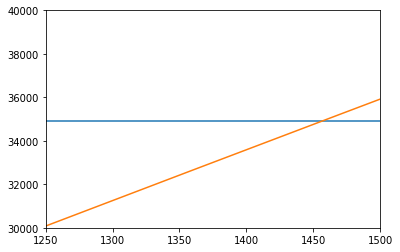

In [17]:
plt.plot(p2_16xl_ben)
plt.plot(dl11_ben)

plt.ylim([30000,40000])
plt.xlim([1250,1500])

plt.show()

In [18]:
dl11_ben[1450]

34758.14790891255

In [19]:
1450/24

60.416666666666664